In [1]:
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [2]:
batch_size = 128
num_classes = 10
epochs = 12

img_rows, img_cols = 28, 28

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [27]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation = 'sigmoid', input_shape = (28,28,1)))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

In [28]:
model.compile(loss = keras.losses.categorical_crossentropy, optimizer = keras.optimizers.Adam(), metrics = ['accuracy'])

model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, verbose = 1, validation_data = (x_test, y_test))

score = model.evaluate(x_test, y_test, verbose = 0)
print("test loss: ", score[0])
print('test Accuracy: ', score[1])

Epoch 1/12
469/469 [==============================] - 37s 77ms/step - loss: 0.2350 - accuracy: 0.9293 - val_loss: 0.0633 - val_accuracy: 0.9805
Epoch 2/12
469/469 [==============================] - 38s 80ms/step - loss: 0.0695 - accuracy: 0.9784 - val_loss: 0.0390 - val_accuracy: 0.9868
Epoch 3/12
469/469 [==============================] - 37s 79ms/step - loss: 0.0520 - accuracy: 0.9842 - val_loss: 0.0383 - val_accuracy: 0.9872
Epoch 4/12
469/469 [==============================] - 36s 76ms/step - loss: 0.0413 - accuracy: 0.9869 - val_loss: 0.0338 - val_accuracy: 0.9885
Epoch 5/12
469/469 [==============================] - 35s 75ms/step - loss: 0.0356 - accuracy: 0.9890 - val_loss: 0.0340 - val_accuracy: 0.9889
Epoch 6/12
469/469 [==============================] - 34s 73ms/step - loss: 0.0322 - accuracy: 0.9898 - val_loss: 0.0346 - val_accuracy: 0.9885
Epoch 7/12
469/469 [==============================] - 35s 74ms/step - loss: 0.0276 - accuracy: 0.9912 - val_loss: 0.0387 - val_accuracy:

In [29]:
model.save('digit_recog.model')

INFO:tensorflow:Assets written to: digit_recog.model\assets


INFO:tensorflow:Assets written to: digit_recog.model\assets


In [30]:
model = keras.models.load_model('digit_recog.model')

In [31]:
import os
import cv2 as cv
import matplotlib.pyplot as pt

1/1 [==============================] - 0s 30ms/step


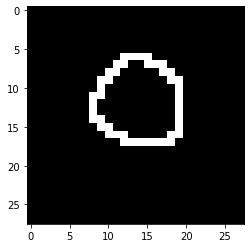

the number is prob a 9
1/1 [==============================] - 0s 26ms/step


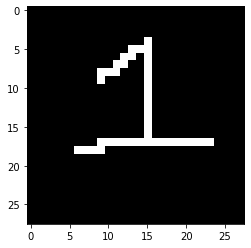

the number is prob a 4
1/1 [==============================] - 0s 24ms/step


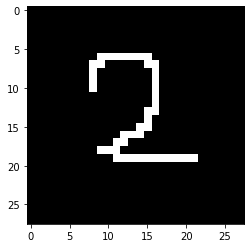

the number is prob a 2
1/1 [==============================] - 0s 22ms/step


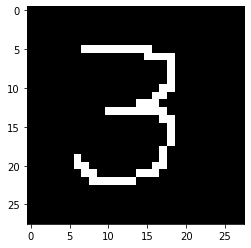

the number is prob a 2
1/1 [==============================] - 0s 23ms/step


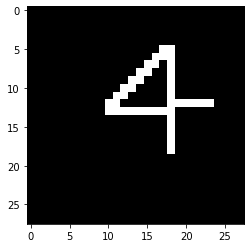

the number is prob a 6
1/1 [==============================] - 0s 25ms/step


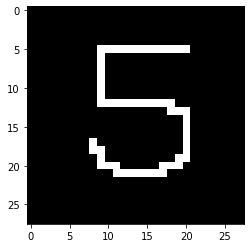

the number is prob a 0
1/1 [==============================] - 0s 59ms/step


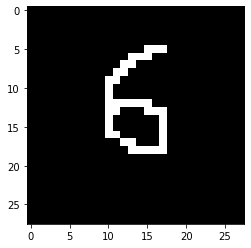

the number is prob a 6
1/1 [==============================] - 0s 28ms/step


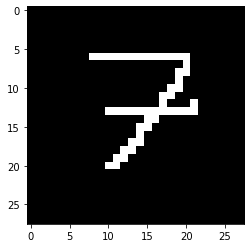

the number is prob a 8
1/1 [==============================] - 0s 25ms/step


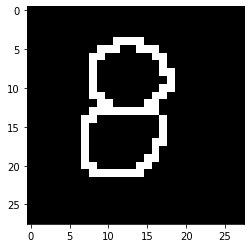

the number is prob a 2
1/1 [==============================] - 0s 29ms/step


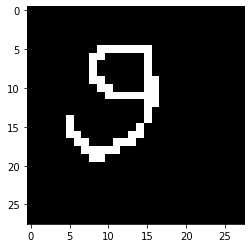

the number is prob a 2


In [33]:
image_num = 0
while os.path.isfile(f"digits/digit{image_num}.png"):
    try:
        img = cv.imread(f"digits/digit_{image_num}.png")[:,:,0]
        img = np.invert(np.array([img]))
        pred = model.predict(img)
        pt.imshow(img[0], cmap = pt.cm.binary)
        pt.show()
        print(f"the number is prob a {np.argmax(pred)}")
    except:
        print("error while opening file!")
    finally:
        image_num+=1
# img = cv.imread(f"digits/digit_9.png")[:,:,0]
# img = np.invert(np.array([img]))
# pred = model.predict(img)
# pt.imshow(img[0], cmap = pt.cm.binary)
# pt.show()
# print(pred)
